In [34]:
#AYUSH KUMAR

In [35]:
#importing all the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [36]:
#reading the dataframe
df=pd.read_csv("Assignment_Dataset.csv")
df.shape

(982, 3)

In [37]:
dfc=df
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    982 non-null    object 
 1   GHI     982 non-null    float64
 2   PR      982 non-null    float64
dtypes: float64(2), object(1)
memory usage: 23.1+ KB


In [38]:
#converting to datetime type
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc = dfc.sort_values(by = 'Date')
dfc.tail()

,Date,GHI,PR
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149
981,2022-03-24,5.125050,79.911798


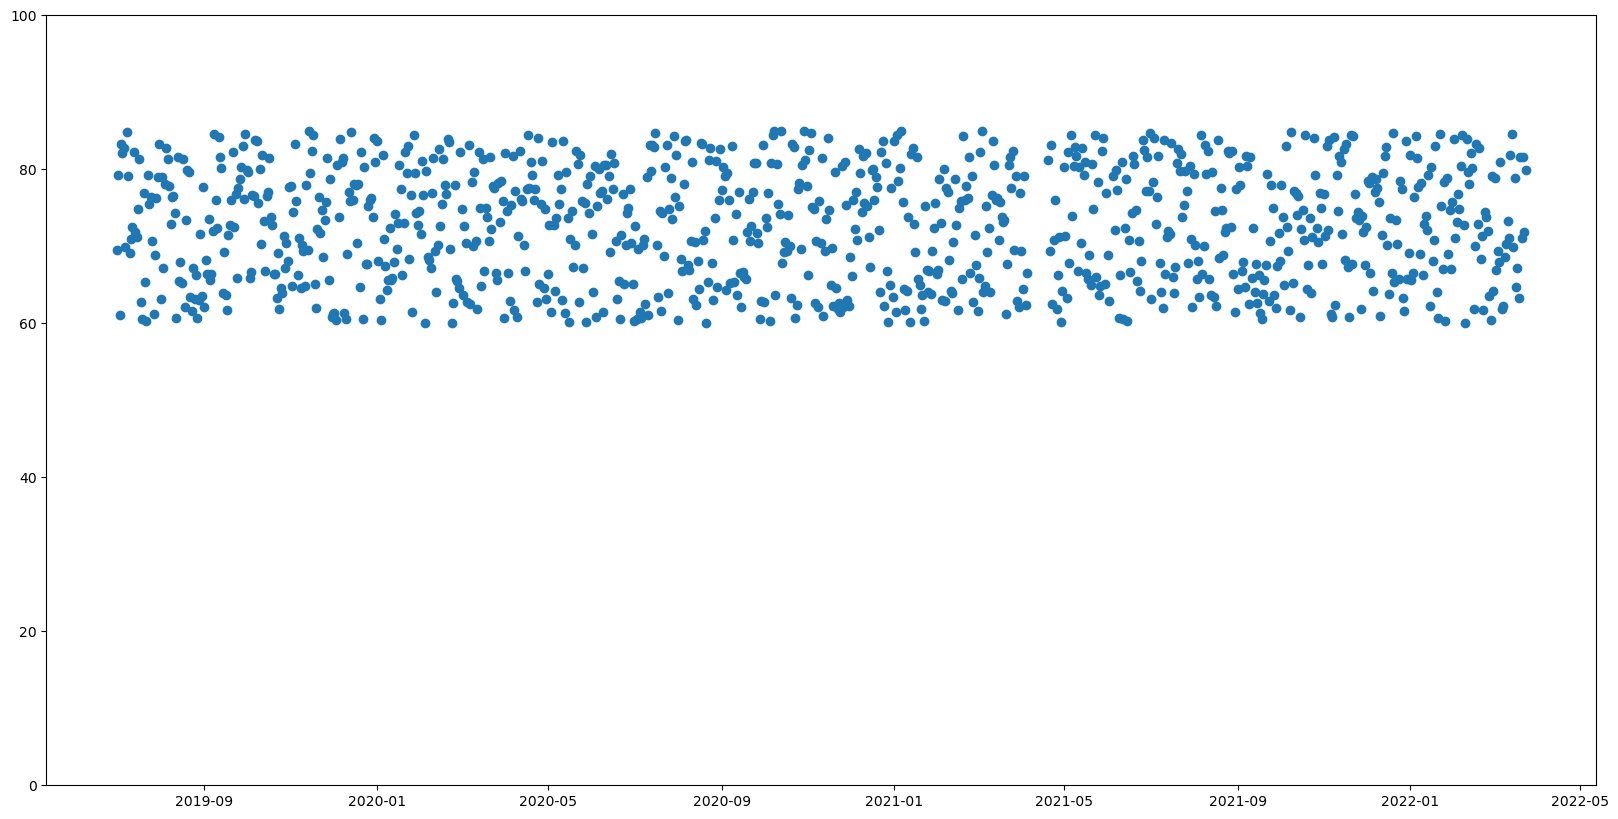

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(dfc['Date'],dfc['PR'])
plt.ylim(0,100)
plt.show()

In [40]:
dfc['avg'] = dfc['PR'].rolling(30).mean()
dfc.head()

,Date,GHI,PR,avg
0,2019-07-01,3.256608,69.575676,NaN
1,2019-07-02,3.976767,79.314411,NaN
2,2019-07-03,2.811867,61.020006,NaN
3,2019-07-04,3.658408,83.262576,NaN
4,2019-07-05,5.590683,82.124440,NaN


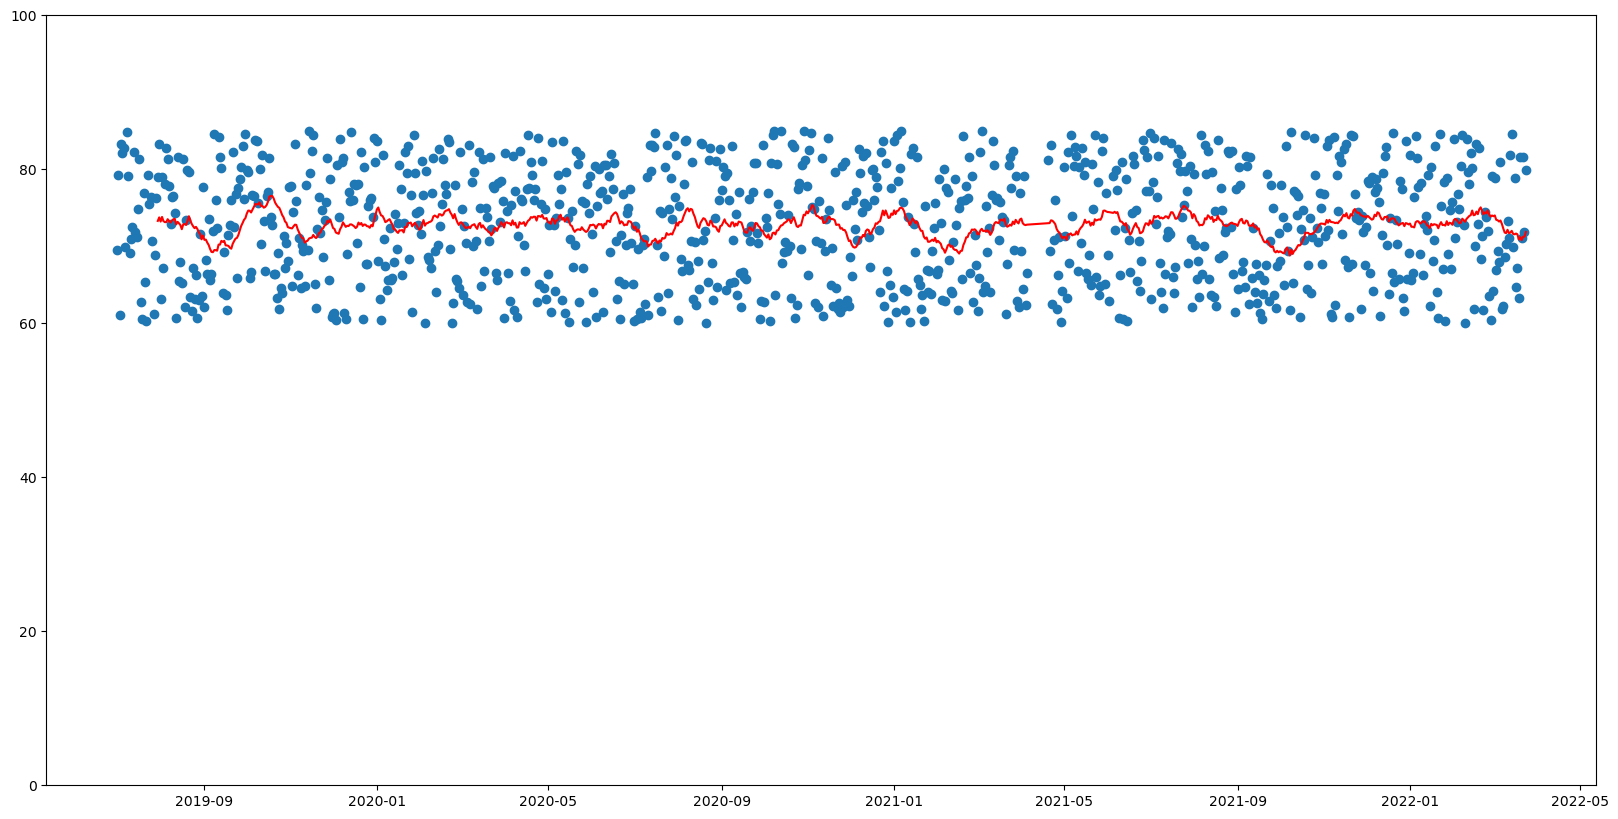

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(dfc['Date'],dfc['PR'])
plt.plot(dfc['Date'],dfc['avg'],'r')
plt.ylim(0,100)
plt.show()

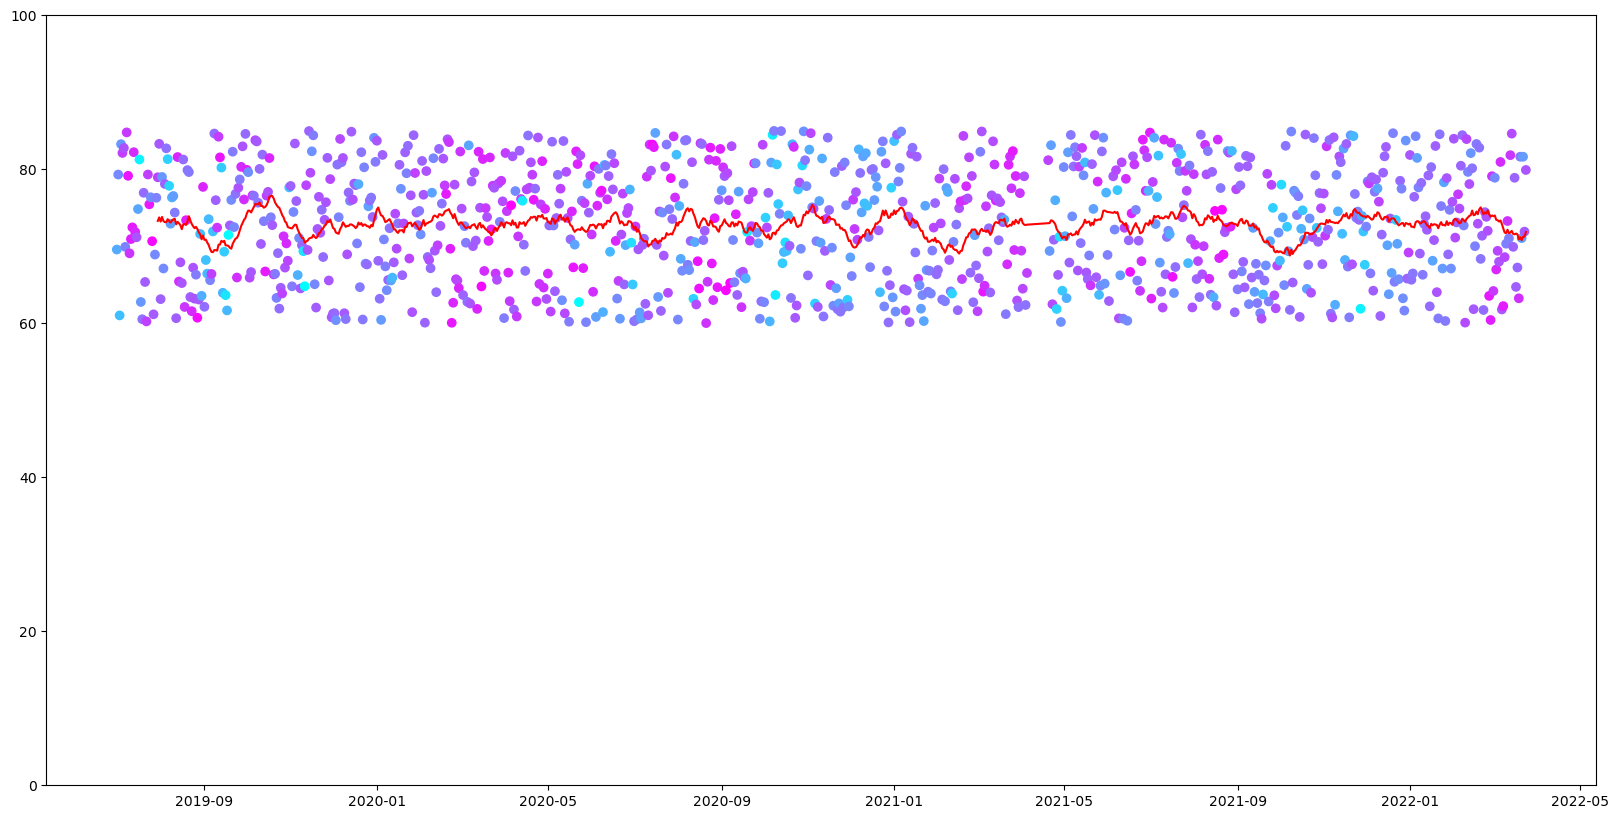

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(dfc['Date'],dfc['PR'],c=dfc['GHI'],cmap='cool')
plt.plot(dfc['Date'],dfc['avg'],'r')
plt.ylim(0,100)
plt.show()

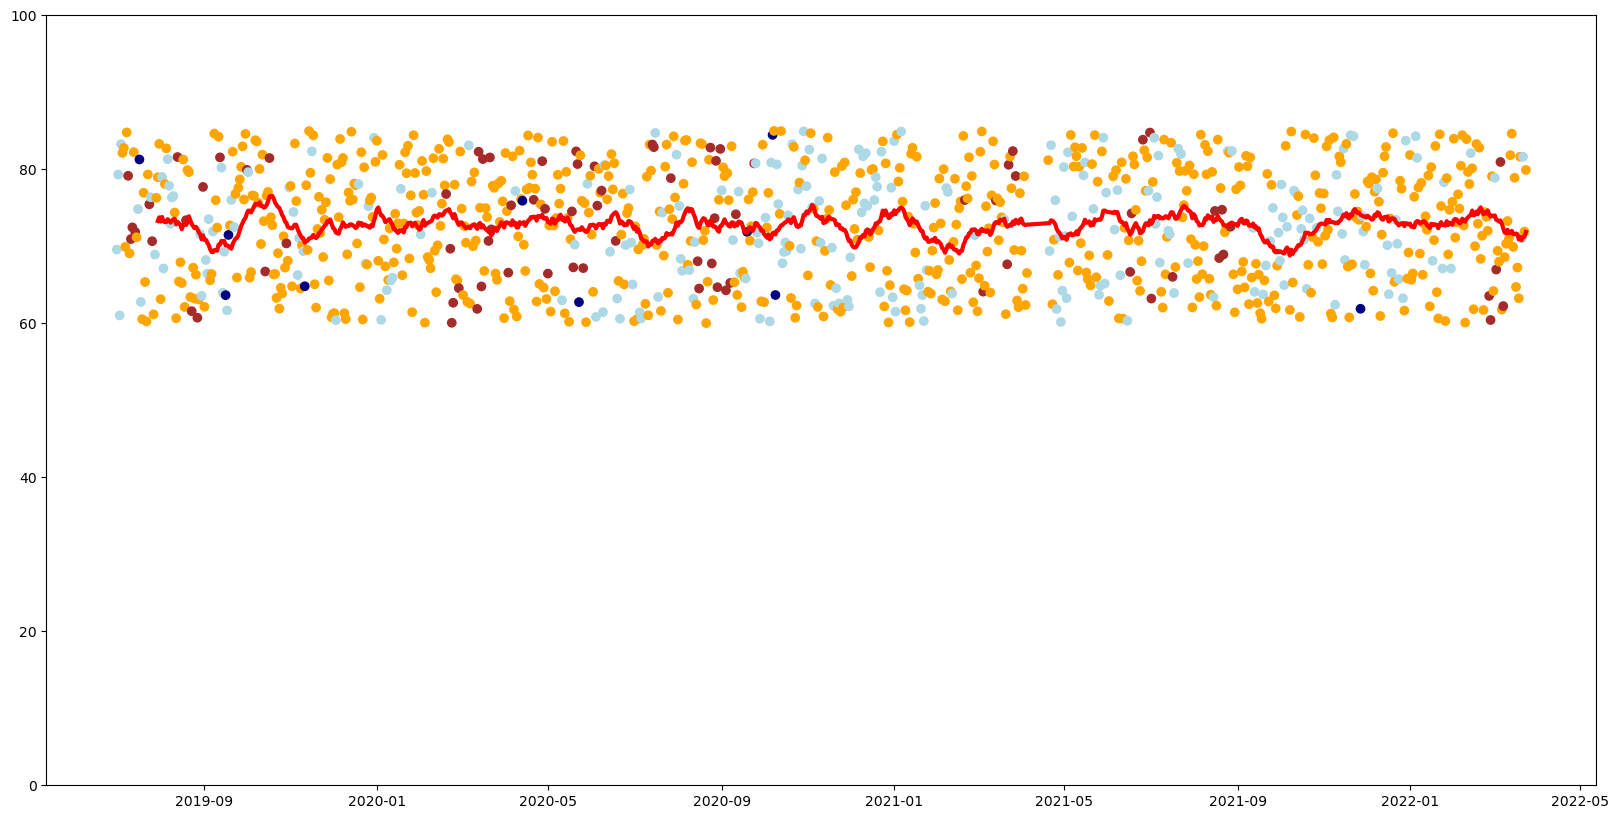

In [43]:
plt.figure(figsize=(20,10))

cmap = (mpl.colors.ListedColormap(['lightblue','orange'])
        .with_extremes(under='navy', over='brown'))
bounds = [2,4,6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.scatter(dfc['Date'],dfc['PR'],c=dfc['GHI'],cmap=cmap,norm=norm)
plt.plot(dfc['Date'],dfc['avg'],'r',linewidth=3)
plt.ylim(0,100)
plt.show()


In [44]:
datt = dfc['Date']
datt.dtype

dtype('<M8[ns]')

In [45]:
dat = np.datetime_as_string(datt, unit='D')

In [46]:
dfc.head()

,Date,GHI,PR,avg
0,2019-07-01,3.256608,69.575676,NaN
1,2019-07-02,3.976767,79.314411,NaN
2,2019-07-03,2.811867,61.020006,NaN
3,2019-07-04,3.658408,83.262576,NaN
4,2019-07-05,5.590683,82.124440,NaN


In [47]:
tb = []
for da in dat:
    if(da == '2019-07-01'):
        k = 73.9
        tb.append(k)
    elif(da == '2020-07-01'):
        k = round(k - 0.6 , 1)
        tb.append(k)
    elif(da == '2021-07-01'):
        k = round(k - 0.6 , 1)
        tb.append(k)
    elif(da == '2022-07-01'):
        k = round(k - 0.6 , 1)
        tb.append(k)
    else:
        tb.append(k)

In [48]:
dfc.tail()

,Date,GHI,PR,avg
977,2022-03-20,4.226183,81.632738,71.181262
978,2022-03-21,3.431675,71.057353,70.789540
979,2022-03-22,3.580492,81.631509,71.231840
980,2022-03-23,4.997617,71.906149,71.249772
981,2022-03-24,5.125050,79.911798,71.855995


In [49]:
ntb = np.array(tb)

In [50]:
dfc['tbud'] = ntb

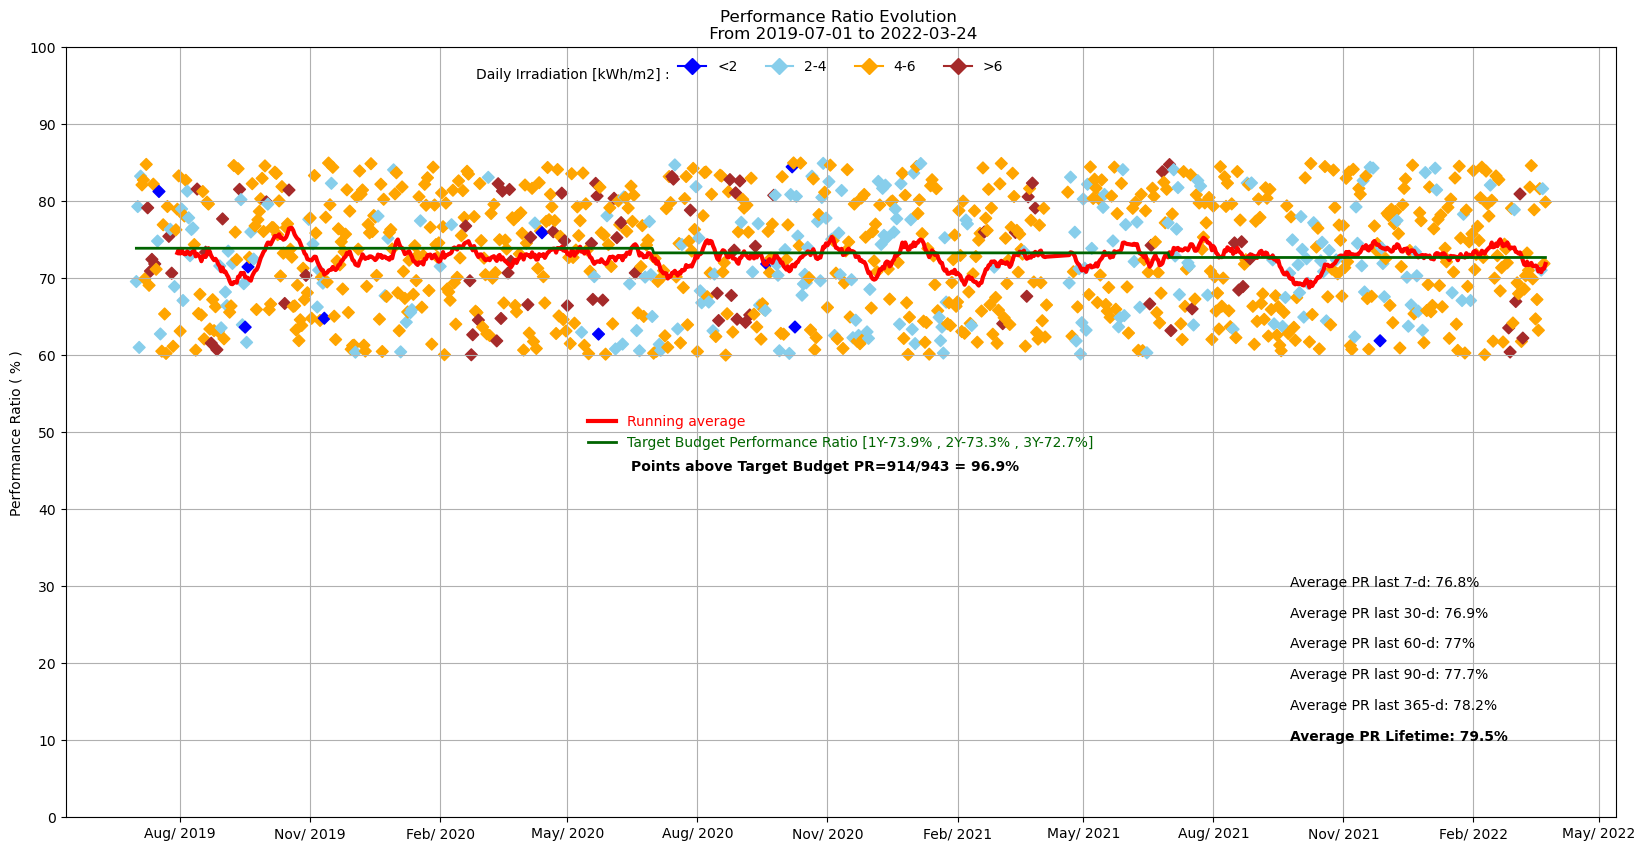

In [52]:

plt.figure(figsize=(20,10))
cmap = (mpl.colors.ListedColormap(['skyblue','orange']).with_extremes(under='blue', over='brown'))
bounds = [2,4,6]

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.ylabel("Performance Ratio ( % )") 
plt.title("Performance Ratio Evolution \n From 2019-07-01 to 2022-03-24") 

plt.scatter(dfc['Date'],dfc['PR'],c=dfc['GHI'],cmap=cmap,norm=norm,marker='D')
plt.plot(dfc['Date'],dfc['avg'],'r',linewidth=3,label='Running average')
plt.plot(dfc['Date'],dfc['tbud'],'darkgreen',linewidth=2,label='Target Budget Performance Ratio [1Y-73.9% , 2Y-73.3% , 3Y-72.7%]')
plt.ylim(0,100)

ticks=[0,10,20,30,40,50,60,70,80,90,100]
plt.yticks(ticks)

legend1=plt.legend(loc='center',frameon=False)
plt.gca().add_artist(legend1)
for line,text in zip(legend1.get_lines(),legend1.get_texts()):
    text.set_color(line.get_color())
    
plt.text(dfc['Date'][800],30,"Average PR last 7-d: 76.8%")
plt.text(dfc['Date'][800],26,"Average PR last 30-d: 76.9%")
plt.text(dfc['Date'][800],22,"Average PR last 60-d: 77%")
plt.text(dfc['Date'][800],18,"Average PR last 90-d: 77.7%")
plt.text(dfc['Date'][800],14,"Average PR last 365-d: 78.2%")
plt.text(dfc['Date'][800],10,"Average PR Lifetime: 79.5%",weight='bold')
plt.text(dfc['Date'][350],45,"Points above Target Budget PR=914/943 = 96.9%",weight='bold')

date_form = mdates.DateFormatter("%b/ %Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))



plt.text(dfc['Date'][240],96,"Daily Irradiation [kWh/m2] :")
legend_elements = [
    Line2D([], [], marker='D', color='blue', label='<2', markerfacecolor='blue', markersize=8),
    Line2D([], [], marker='D', color='skyblue', label='2-4', markerfacecolor='skyblue', markersize=8),
    Line2D([], [], marker='D', color='orange', label='4-6', markerfacecolor='orange', markersize=8),
    Line2D([], [], marker='D', color='brown', label='>6', markerfacecolor='brown', markersize=8)
]
plt.legend(handles=legend_elements, loc='upper center',ncol=len(legend_elements),frameon=False)


plt.grid()
plt.show()